<a href="https://colab.research.google.com/github/AMEY-GAIKAR/Kaggle-Colaboratory/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import re
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [61]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
df = pd.read_csv('/content/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [63]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [64]:
df['length'] = df['message'].apply(len)
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [65]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: xlabel='length', ylabel='Count'>

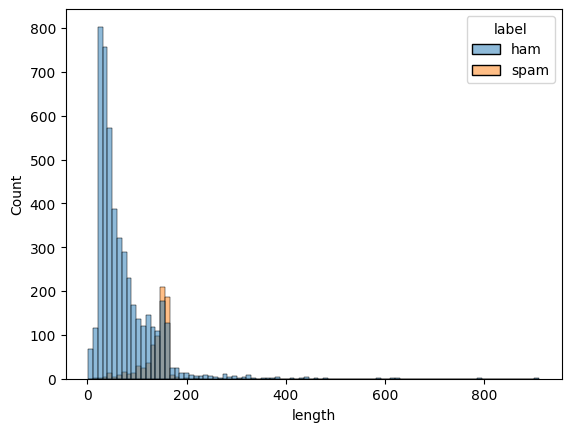

In [66]:
sns.histplot(data=df, x='length', hue='label')

In [67]:
def processor_1(message):
    str = [char for char in message if char not in string.punctuation]
    str = ''.join(str)
    return [word for word in str.split() if word.lower() not in nltk.corpus.stopwords.words('english')]

def processor_2(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [68]:
X = df.message
y= df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [69]:
bow_transformer = CountVectorizer(analyzer=processor_1)
bow_transformer.fit(X_train)
X_train = bow_transformer.transform(X_train)
X_test = bow_transformer.transform(X_test)


tfidf = TfidfTransformer()
tfidf.fit(X_train)
X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
print(confusion_matrix(y_test, predictions))

[[1452    0]
 [  55  165]]


In [70]:
X = df.message
y= df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [71]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=processor_1)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, predictions))

[[1438    0]
 [  69  165]]


In [72]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=processor_1)),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression())
])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, predictions))

[[1437    1]
 [  88  146]]


In [73]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=processor_1)),
    ('tfidf', TfidfTransformer()),
    ('classifier', DecisionTreeClassifier())
])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, predictions))

[[1418   20]
 [  51  183]]


In [74]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=processor_1)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, predictions))

[[1437    1]
 [  52  182]]
